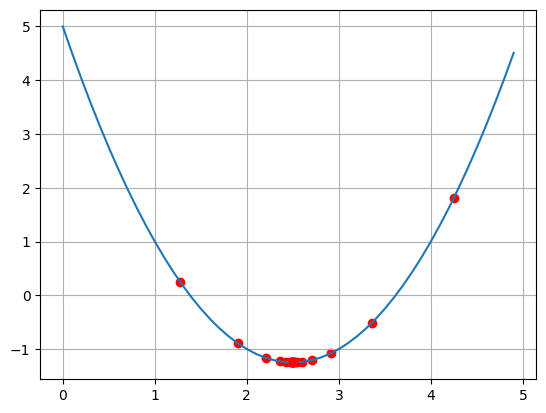

2.4980051933425598


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import plotly.graph_objects as go

%matplotlib inline


def f(x):
    return x*x - 5*x + 5

def df(x):
    return 2*x - 5

# Number of iterations
N = 20
# Initial value
xx = 0
# Convergence step
lmd = 0.85

x_plt = np.arange(0, 5.0, 0.1)
y_plt = [f(x) for x in x_plt]

fig, ax = plt.subplots()
ax.grid(True)

ax.plot(x_plt, y_plt)
point, = ax.plot(xx, f(xx), 'ro')  # Use a line plot for better animation

for i in range(N):
    xx = xx - lmd * df(xx)
    
    point.set_xdata(xx)
    point.set_ydata(f(xx))
    
    ax.scatter(xx, f(xx), c='red')
    
    clear_output(wait=True)
    display(fig)
    time.sleep(0.2)

plt.close()  # Close the figure at the end   to avoid displaying the final plot twice
print(xx)
ax.scatter(xx, f(xx), c='blue')
plt.show()

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, widgets

def f(x):
    return x ** 2

def plot_optimization_process(x_values, y_values, learning_rate):
    clear_output(wait=True)  # Clear the previous plot
    plt.figure(figsize=(8, 6))
    
    # Plot the quadratic function
    x = np.linspace(-12, 12, 100)
    y = f(x)
    plt.plot(x, y, label='f(x) = x^2', color='gray', linestyle='--')
    
    # Plot the optimization process
    plt.plot(x_values, y_values, label=f'Learning Rate: {learning_rate:.2f}', marker='o')
    
    plt.title('SGD optimization')
    plt.xlabel('Variable Value')
    plt.ylabel('Objective Function Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set the matplotlib backend to inline for Jupyter Notebook
%matplotlib inline

def update_plot(slider_value):
    clear_output(wait=True)
    
    # Disable the slider during the loop
    slider.disabled = True
    
    tfx = tf.Variable(10.0)
    step_count = 0
    x_values = [tfx.numpy()]  # Initialize with the first point
    y_values = [f(tfx).numpy()]
    
    learning_rate = slider_value
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    for i in range(0, 200):
        val = optimizer.minimize(lambda: f(tfx), var_list=[tfx])
        x_values.append(tfx.numpy())
        y_values.append(f(tfx).numpy())
        if (np.round(f(tfx).numpy(), 3) < 1 or np.round(f(tfx).numpy(), 3) > 150):
            break

        # Plot the optimization process in real-time
        plot_optimization_process(x_values, y_values, learning_rate)
        step_count += 1
    
    # Re-enable the slider after the loop
    slider.disabled = False

    # Display the final plot
    plot_optimization_process(x_values, y_values, learning_rate)
    # print("Learning rate: ", learning_rate, " Minimum value: (", np.round(tfx.numpy(), 3), ",", np.round(f(tfx).numpy(), 3), ") Total steps taken: ", step_count)

# Create an interactive slider
slider = widgets.FloatSlider(min=0, max=1.1, step=0.01, value=0.7, continuous_update=False, description='Learning Rate:')
interact(update_plot, slider_value=slider)


interactive(children=(FloatSlider(value=0.7, continuous_update=False, description='Learning Rate:', max=1.1, s…

<function __main__.update_plot(slider_value)>

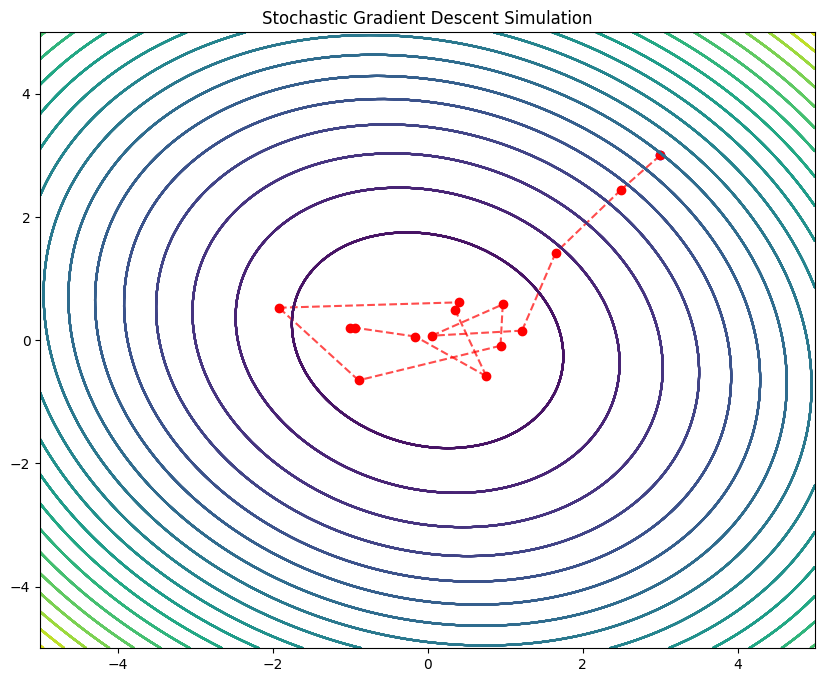

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Define the objective function (multidimensional)
def objective_function(x, y):
    return x**2 + y**2 + 0.3 * x * y

# Gradient of the objective function
def gradient(x, y):
    return np.array([2*x + 0.3*y, 2*y + 0.3*x])

# Stochastic Gradient Descent algorithm with noise and convergence threshold
def stochastic_gradient_descent(initial_point, learning_rate, num_iterations, noise_scale=0.05, convergence_threshold=0.01):
    points = [initial_point]
    for _ in range(num_iterations):
        grad = gradient(*points[-1])
        noise = noise_scale * np.random.randn(2)  # Adding Gaussian noise
        update = -learning_rate * (grad + noise)
        new_point = points[-1] + update
        points.append(new_point)
        
        # Check convergence
        if np.linalg.norm(update) < convergence_threshold:
            break
    
    return np.array(points)

# Initial parameters
initial_point = np.array([3, 3])
learning_rate = 0.2
num_iterations = 50

# Create a contour plot of the objective function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
ax.set_title('Stochastic Gradient Descent Simulation')


# Plot the initial point
initial_point_plot = ax.scatter(*initial_point, color='blue', label='Initial Point')

# Plot the trajectory of SGD with noise and convergence threshold step-by-step
trajectory = stochastic_gradient_descent(initial_point, learning_rate, num_iterations, noise_scale=4.2, convergence_threshold=0.1)

for i in range(len(trajectory)):
    # Clear the previous plot
    clear_output(wait=True)
    
    # Plot the contour
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis')
    
    # Plot the dashed lines connecting points
    if i > 0:
        ax.plot([trajectory[i-1, 0], trajectory[i, 0]], [trajectory[i-1, 1], trajectory[i, 1]], linestyle='dashed', color='red', alpha=0.7)
    
    # Plot the current point
    ax.scatter(*trajectory[i], color='red', label=f'SGD Step {i+1}')
    
    # Update the display
    display(fig)
    
    # Pause for 50ms
    time.sleep(0.05)

# Plot the final point
ax.scatter(*trajectory[-1], color='green', label='Final Point')

# Close the figure after the loop
plt.close()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

# Enable interactive plots in the notebook
%matplotlib notebook

# Function to calculate the gradient vector
def gradient(x):
    # Replace this with your actual gradient function
    return np.array([2*x[0], 3*x[1], 4*x[2]])

# Function to calculate the pseudo-gradient vector
def pseudo_gradient(x, angle):
    # Calculate the pseudo-gradient based on the angle
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                [np.sin(angle), np.cos(angle), 0],
                                [0, 0, 1]])
    return np.dot(rotation_matrix, gradient(x))

# Function to update the plot based on the slider values
def update(val):
    ax.cla()  # Clear the current axes
    ax.quiver(0, 0, 0, *gradient([1, 1, 1]), color='blue', label='Gradient')
    ax.quiver(0, 0, 0, *pseudo_gradient([1, 1, 1], angle_slider.val), color='red', label='Pseudo-Gradient')
    ax.legend()
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, 5])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.draw()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial angle value
initial_angle = np.pi / 4

# Create a slider for adjusting the angle with an upper bound of 1.1
angle_slider_ax = plt.axes([0.2, 0.02, 0.65, 0.03])
angle_slider = Slider(angle_slider_ax, 'Angle', 0, 1.1, valinit=initial_angle)
angle_slider.on_changed(update)

# Initialize the plot
update(None)
plt.show()


<IPython.core.display.Javascript object>